# Project 2

- Mobile Data를 이용해 모델링
- 여러 알고리즘으로 모델을 만들어 성능 예측 -> 튜닝

In [1]:
# Library 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# data 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data['CHURN'] = data['CHURN'].map({'STAY':0, 'LEAVE':1})

In [3]:
# 데이터 확인
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,1
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0


In [4]:
# 기초통계량 확인
data.describe()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,CHURN
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.502400,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250,0.492600
std,5773.647028,0.500007,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558,0.499958
min,1.000000,0.000000,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000,0.000000
25%,5000.750000,0.000000,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000,0.000000
50%,10000.500000,1.000000,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000,0.000000
75%,15000.250000,1.000000,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000,1.000000
max,20000.000000,1.000000,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000,1.000000


In [5]:
# id 변수 제거
drop_cols = ['id']
data.drop(drop_cols, axis=1, inplace=True)
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,1
4,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0


In [6]:
# x, y 분리
target = 'CHURN'

x = data.drop(target, axis=1)
y = data.loc[:, target]

In [7]:
# 가변수화 : REPORTED_SATISFACTION, REPORTED_USAGE_LEVEL, CONSIDERING_CHANGE_OF_PLAN
dumm_cols = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(data=x, columns=dumm_cols, drop_first=True)
x.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,31953,0,6,313378,161,0,4,0,1,0,0,0,1,0,0,0,0,1,0
1,1,36147,0,13,800586,244,0,6,0,1,0,0,0,1,0,0,1,0,0,0
2,1,27273,230,0,305049,201,16,15,0,1,0,0,0,0,0,1,0,0,0,1
3,0,120070,38,33,788235,780,3,2,0,1,0,0,0,0,1,0,1,0,0,0
4,1,29215,208,85,224784,241,21,1,0,0,0,1,0,1,0,0,0,1,0,0


In [8]:
# train, test 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [9]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [13]:
# 사용할 함수 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#### 모델링

In [14]:
# 모델 성능 기록
result = {}

In [15]:
# KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_s, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

result['KNN'] = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.49      0.75      0.60      3065
           1       0.43      0.20      0.27      2935

    accuracy                           0.48      6000
   macro avg       0.46      0.47      0.43      6000
weighted avg       0.46      0.48      0.44      6000



In [16]:
# Decision Tree
model = DecisionTreeClassifier(max_depth=5, random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

result['Decision Tree'] = accuracy_score(y_test, y_pred)
result

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      3065
           1       0.69      0.71      0.70      2935

    accuracy                           0.70      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.70      0.70      0.70      6000



{'KNN': 0.48033333333333333, 'Decision Tree': 0.6981666666666667}

In [17]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

result['Logistic Regression'] = accuracy_score(y_test, y_pred)
result

              precision    recall  f1-score   support

           0       0.63      0.64      0.64      3065
           1       0.62      0.61      0.62      2935

    accuracy                           0.63      6000
   macro avg       0.63      0.63      0.63      6000
weighted avg       0.63      0.63      0.63      6000



{'KNN': 0.48033333333333333,
 'Decision Tree': 0.6981666666666667,
 'Logistic Regression': 0.626}

In [18]:
# Random Forest
model = RandomForestClassifier(max_depth=5, random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

result['Random Forest'] = accuracy_score(y_test, y_pred)
result

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      3065
           1       0.70      0.65      0.68      2935

    accuracy                           0.69      6000
   macro avg       0.70      0.69      0.69      6000
weighted avg       0.70      0.69      0.69      6000



{'KNN': 0.48033333333333333,
 'Decision Tree': 0.6981666666666667,
 'Logistic Regression': 0.626,
 'Random Forest': 0.695}

In [19]:
# XGBoost
model = XGBClassifier(max_depth=5, random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

result['XGBoost'] = accuracy_score(y_test, y_pred)
result

              precision    recall  f1-score   support

           0       0.71      0.66      0.68      3065
           1       0.67      0.73      0.70      2935

    accuracy                           0.69      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.69      0.69      0.69      6000



{'KNN': 0.48033333333333333,
 'Decision Tree': 0.6981666666666667,
 'Logistic Regression': 0.626,
 'Random Forest': 0.695,
 'XGBoost': 0.6903333333333334}

In [20]:
# LightGBM
model = LGBMClassifier(max_depth=5, random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

result['LightGBM'] = accuracy_score(y_test, y_pred)
result

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6917, number of negative: 7083
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 14000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494071 -> initscore=-0.023715
[LightGBM] [Info] Start training from score -0.023715
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

{'KNN': 0.48033333333333333,
 'Decision Tree': 0.6981666666666667,
 'Logistic Regression': 0.626,
 'Random Forest': 0.695,
 'XGBoost': 0.6903333333333334,
 'LightGBM': 0.6911666666666667}

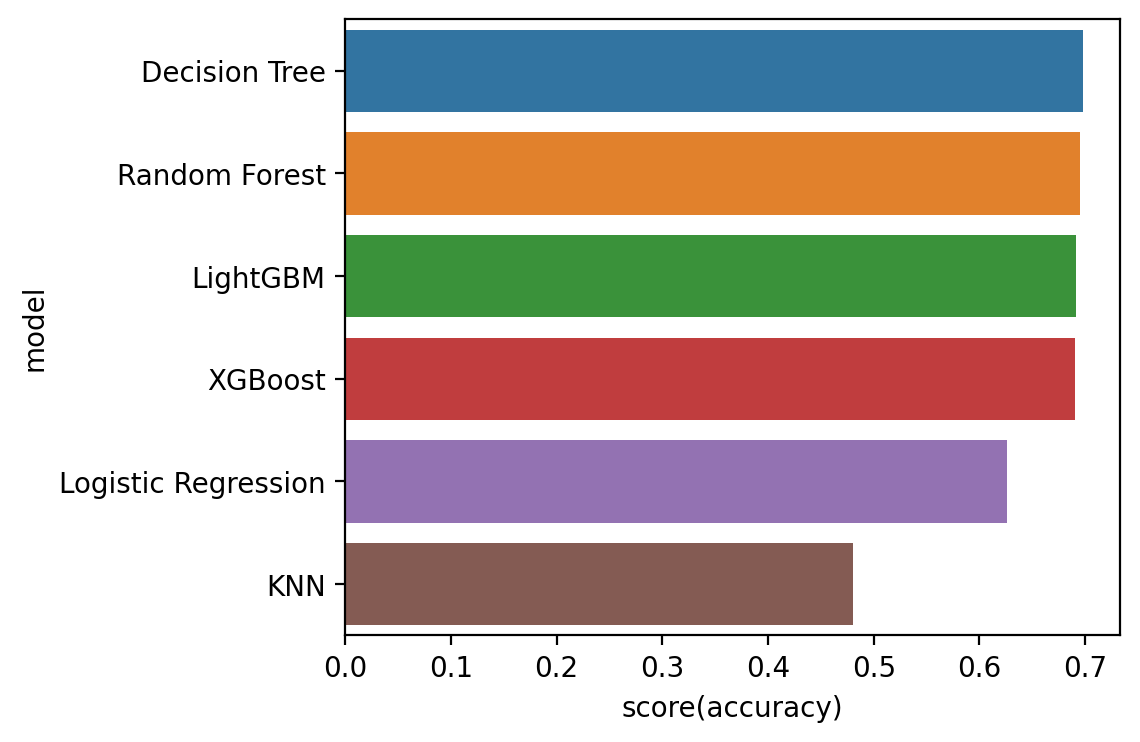

In [22]:
perf_dic = {'model': result.keys(), 'score(accuracy)': result.values()}
df = pd.DataFrame(perf_dic)
df.sort_values(by='score(accuracy)', ascending=False, inplace=True)

plt.figure(figsize=(5, 4))
sns.barplot(x=df['score(accuracy)'], y=df['model'])
plt.show()

In [23]:
# 모델 튜닝
from sklearn.model_selection import GridSearchCV

param = {'max_depth': range(1, 31)}  # max_depth hyperparameter 만 다루겠음
model_dt = DecisionTreeClassifier(random_state=1)
model = GridSearchCV(model_dt,
                     param,
                     cv=5,
                     scoring='accuracy')

In [24]:
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': range(1, 31)}, scoring='accuracy')

In [25]:
# 결과 확인
print("=" * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print(model.best_params_)
print('-' * 80)
print(model.best_score_)
print('=' * 80)

[0.61735714 0.656      0.68907143 0.69964286 0.69621429 0.69757143
 0.69742857 0.69428571 0.68792857 0.67871429 0.67385714 0.66828571
 0.65785714 0.65592857 0.65107143 0.64414286 0.63921429 0.6355
 0.63342857 0.62442857 0.62321429 0.62435714 0.61742857 0.61914286
 0.62078571 0.6205     0.6165     0.61685714 0.61792857 0.61814286]
--------------------------------------------------------------------------------
{'max_depth': 4}
--------------------------------------------------------------------------------
0.6996428571428571


In [26]:
# 성능 평가
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.63      0.68      3065
           1       0.67      0.78      0.72      2935

    accuracy                           0.70      6000
   macro avg       0.71      0.70      0.70      6000
weighted avg       0.71      0.70      0.70      6000

